# One objective

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

## Ta sẽ quy về 1 objective, thử implements với greedy search và so sánh kết quả 

In [2]:
n = 600 # number of problems
m = 20 # problem types
k = 25 # students


In [3]:
R = np.random.randint(low=0,high=11,dtype='int32',size=[n,k])

In [4]:
# R là kết quả của k students với n problems
R.shape

(600, 25)

In [5]:
# Số bài mỗi dạng : Random bằng cách reo xúc xắc 20 mặt 300 lần. 

In [6]:
number_of_problems = np.random.multinomial(n, [1./m]*m)

In [7]:
number_of_problems

array([40, 21, 30, 36, 26, 33, 30, 32, 28, 24, 33, 31, 24, 29, 29, 35, 28,
       33, 34, 24])

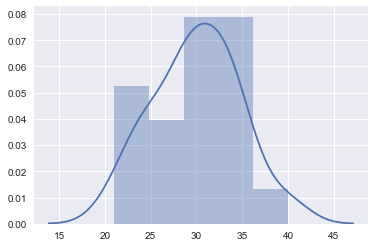

In [8]:
sns.distplot(number_of_problems)

In [9]:
# P : k*m là ma trận điểm số của k student cho m dạng bài 
P = np.zeros([k,m],dtype='float32') # chưa tính giá trị
P.shape

(25, 20)

In [10]:
# Tính tổng điểm của m problem type cho k student
start = 0
for i in range(m):
    quantity = number_of_problems[i]
    # print(quantity)
    P[:,i] = (R[start:start+quantity, : ].sum(axis=0))/(quantity*10) # Kết quả mỗi dạng max = 1
    start+=quantity

In [11]:
# Kết quả của students i = 5
print("Result of student i = 5 :")
print(P[5,:])
print("student i = 5 performed best at problems type #", np.argmax(P[5,:]),"with score = ", np.amax(P[5,:]) )

Result of student i = 5 :
[ 0.51249999  0.48571429  0.52333331  0.49166667  0.43461537  0.45151514
  0.52333331  0.58437502  0.40357143  0.40416667  0.55151516  0.55806452
  0.34583333  0.44482759  0.40344828  0.58857143  0.5535714   0.56060606
  0.44705883  0.51249999]
student i = 5 performed best at problems type # 15 with score =  0.588571


In [12]:
# Tìm problems type tốt nhất k student
Best_perform_distribution = np.zeros(k, dtype='int32') 

In [13]:
Best_perform_distribution = np.argmax(P, axis=1)
Best_perform_distribution

array([ 8,  7,  4,  7, 14, 15, 12,  8, 10,  1,  2,  1,  8, 15,  9,  0, 18,
       18, 15,  5, 15,  1,  3,  7,  2], dtype=int64)

(array([ 1.,  3.,  2.,  1.,  1.,  1.,  0.,  3.,  3.,  1.,  1.,  0.,  1.,
         0.,  1.,  4.,  0.,  0.,  2.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

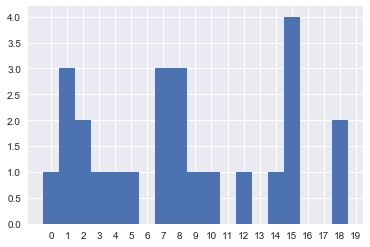

In [14]:
plt.xticks(range(20),range(20))
plt.hist(Best_perform_distribution, 
         bins=np.arange(20)-0.5)

[10 19 19 13 12 12  1 10  1 17  3  4  1  5 16  9  7  4 19 10 13 18 12  3  1]


(array([ 0.,  4.,  0.,  2.,  2.,  1.,  0.,  1.,  0.,  1.,  3.,  0.,  3.,
         2.,  0.,  0.,  1.,  1.,  1.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 1 Patch objects>)

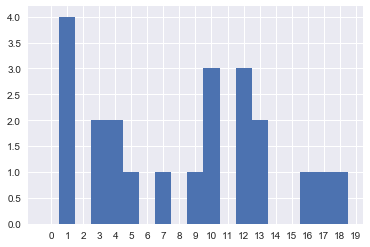

In [15]:
Worst_perform_distribution = np.argmin(P, axis=1)
print(Worst_perform_distribution)
plt.xticks(range(20),range(20))

plt.hist(Worst_perform_distribution, 
         bins=np.arange(20)-0.5, histtype='stepfilled')

In [16]:
P[0,:] # Performance of student index i = 0

array([ 0.435     ,  0.54761904,  0.48333332,  0.51666665,  0.47692308,
        0.44848484,  0.51999998,  0.44374999,  0.58928573,  0.58333331,
        0.38181818,  0.48387095,  0.47083333,  0.53448278,  0.51379311,
        0.5057143 ,  0.51071429,  0.4848485 ,  0.47647059,  0.57083333], dtype=float32)

In [17]:
avg = np.mean(P, axis=0)

In [18]:
avg # Điểm số trung bình của tất cả sinh viên

array([ 0.50639999,  0.50285709,  0.50266671,  0.49277782,  0.51584619,
        0.49599999,  0.51373327,  0.51137507,  0.51014286,  0.5115    ,
        0.50387877,  0.51187086,  0.49683338,  0.50482762,  0.49324146,
        0.52994287,  0.50371432,  0.49612126,  0.51988238,  0.48083332], dtype=float32)

In [19]:
def mean_score(x):
    # input x : list [0...1...] where x_i = 1 if student i is on team
    return P[x,:].mean(axis=0)

In [20]:
mean_score([1,2,3])

array([ 0.53500003,  0.52222222,  0.43333331,  0.41759261,  0.53589743,
        0.48989901,  0.50111109,  0.5916667 ,  0.50238091,  0.48333335,
        0.47676769,  0.50860214,  0.45555556,  0.46091953,  0.5103448 ,
        0.47333333,  0.52738094,  0.47777775,  0.50588232,  0.37083337], dtype=float32)

In [21]:
np.sum(P[[1,2,3],:],axis=0)/3 # ok

array([ 0.53500003,  0.52222222,  0.43333331,  0.41759261,  0.53589743,
        0.48989901,  0.50111109,  0.5916667 ,  0.50238091,  0.48333335,
        0.47676769,  0.50860214,  0.45555556,  0.46091953,  0.5103448 ,
        0.47333333,  0.52738094,  0.47777775,  0.50588232,  0.37083337], dtype=float32)

In [22]:
np.sum(mean_score([1,2,3]) > avg)

6

In [23]:
mean_score([1,2,3]) > avg

array([ True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False], dtype=bool)

In [24]:
def test_objective(x):
    # input x : list [0...1...] where x_i = 1 if student i is on team
    # decrease 1% of team score for each problem type that perform under average 
    mean = mean_score(x)
    under = np.sum(mean < avg) # no types which score is lower than average
    return np.sum(mean) * (100-under)/100 # reduce it

In [25]:
test_objective([1,2,3])

8.4106570625305181

In [26]:
sum(mean_score([1,2,3]))

9.7798340916633606

In [27]:
mean_score([1,2,3])

array([ 0.53500003,  0.52222222,  0.43333331,  0.41759261,  0.53589743,
        0.48989901,  0.50111109,  0.5916667 ,  0.50238091,  0.48333335,
        0.47676769,  0.50860214,  0.45555556,  0.46091953,  0.5103448 ,
        0.47333333,  0.52738094,  0.47777775,  0.50588232,  0.37083337], dtype=float32)

In [28]:
team = []
means = []
news = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            team.append([first,second,last])
            means.append(np.sum(mean_score([first,second,last])))
            news.append(test_objective([first,second,last]))

In [29]:
np.corrcoef(means,news)

array([[ 1.        ,  0.90151138],
       [ 0.90151138,  1.        ]])

In [30]:
import pandas as pd

data = pd.DataFrame(
    {
        'Mean result' : means,
        'Mean result reduced' : news
    }
)



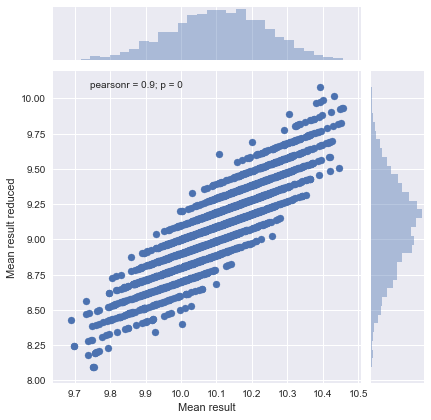

In [31]:
plt.figure(figsize = (16,5))

sns.jointplot(x='Mean result',y='Mean result reduced', data=data)

In [32]:
max_sum = means.index(max(means))
max_new = news.index(max(news))

In [33]:
best_objective_team = team[max_new]
best_old_team = team[max_sum]

In [34]:
print('Result of team ',best_old_team,' with highest mean score : ')
print(mean_score(best_old_team))
print('Number of problems type under avg : ', np.sum(mean_score(best_old_team) < avg))

Result of team  [8, 9, 21]  with highest mean score : 
[ 0.52999997  0.56666666  0.48111114  0.5481481   0.52307689  0.47777781
  0.54777771  0.48749998  0.52261907  0.5152778   0.53636366  0.55376339
  0.54027778  0.50229883  0.50804597  0.5447619   0.49523807  0.49797979
  0.53529412  0.54166669]
Number of problems type under avg :  5


In [35]:
print('Result of team ',best_objective_team,' with highest reduced mean score : ')
print(mean_score(best_objective_team))
print('Number of problems type under avg : ', np.sum(mean_score(best_objective_team) < avg))

Result of team  [8, 9, 23]  with highest reduced mean score : 
[ 0.54333335  0.50634921  0.4611111   0.50833327  0.5282051   0.51616162
  0.55555552  0.48854163  0.52857143  0.5180555   0.559596    0.5333333
  0.51111108  0.50689656  0.5         0.53619045  0.48214284  0.5363636
  0.56078428  0.51249999]
Number of problems type under avg :  3


In [36]:
print('Compare two teams : ')
print(mean_score(best_objective_team) - mean_score(best_old_team))

Compare two teams : 
[ 0.01333338 -0.06031746 -0.02000004 -0.03981483  0.0051282   0.03838381
  0.00777781  0.00104165  0.00595236  0.0027777   0.02323234 -0.02043009
 -0.0291667   0.00459772 -0.00804597 -0.00857145 -0.01309523  0.03838381
  0.02549016 -0.0291667 ]


In [37]:
# Test cosine similarity của 2 team so với E:
def cosine_sim(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

In [38]:
E = number_of_problems

In [39]:
print('Cosine similarity of team with mean reduced objective : ',cosine_sim(mean_score(best_objective_team),E))

Cosine similarity of team with mean reduced objective :  0.989806682707


In [40]:
print('Cosine similarity of best team with mean objective (old idea): ',cosine_sim(mean_score(best_old_team),E))

Cosine similarity of best team with mean objective (old idea):  0.98632128752


In [47]:
#compare student 21 and 23 :
print('student 21 (team highest mean) result with student 23 (team highest objective score)  :')
P[21,:] - P[23,:]

student 21 (team highest mean) result with student 23 (team highest objective score)  :


array([-0.04000002,  0.18095237,  0.06      ,  0.11944443, -0.01538461,
       -0.11515149, -0.02333331, -0.00312495, -0.01785713, -0.00833333,
       -0.06969696,  0.06129032,  0.08750001, -0.01379305,  0.02413791,
        0.02571428,  0.03928569, -0.11515149, -0.07647058,  0.08750001], dtype=float32)

In [48]:
(P[21,:]- P[23,:])[P[21,:] - P[23,:] > 0].sum()

0.68582499

In [49]:
(P[23,:]- P[21,:])[P[23,:] - P[21,:] > 0].sum()

0.49829695